In [30]:


import argparse
import matplotlib.pyplot as plt
from PIL import Image
import os 
from scipy import ndimage
import numpy as np
os.chdir('/content/')



def createFolder(folder) : 
    if not os.path.exists(folder):
        os.mkdir(folder)
     
        

    
def rotateImage(image,degree,folderPath):
    im=plt.imread(image)
    rotated = ndimage.rotate(im, degree)
    np.save(folderPath,rotated)


In [31]:
createFolder('training')
trainingPath= os.path.join(os.getcwd(),'training')
os.chdir(trainingPath)

In [32]:
os.getcwd()

'/content/training'

In [41]:
for degree in [0,90,180,270]:
    newFolderName = f"rotated_{degree}"
    createFolder(newFolderName)
    for image in os.listdir():
      if image.endswith(('png','jpg','PNG','JPG')):
        im=plt.imread(image)
        rotated = ndimage.rotate(im, degree)
        np.save(newFolderName+'/'+image ,rotated)
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


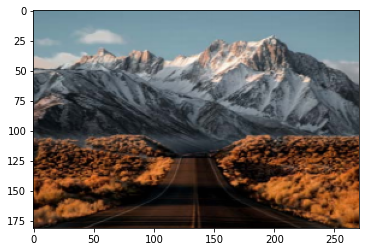

In [46]:
plt.imshow(np.load('/content/training/rotated_0/landscape.PNG.npy'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


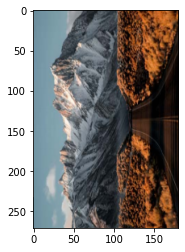

In [45]:
plt.imshow(np.load('/content/training/rotated_90/landscape.PNG.npy'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


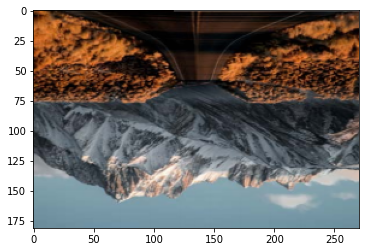

In [48]:
plt.imshow(np.load('/content/training/rotated_180/landscape.PNG.npy'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


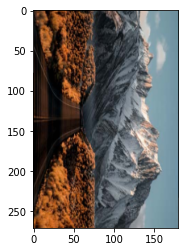

In [50]:
plt.imshow(np.load('/content/training/rotated_270/landscape.PNG.npy'))